In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn_data.csv")

In [3]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [4]:
df.tail(3)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes
999,1000,50,Male,1,56.67,Month-to-Month,NaN,56.67,No,Yes


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [6]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [7]:
df["InternetService"] = df["InternetService"].fillna("")

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [10]:
numeric_columns_data = df.select_dtypes(include=["number"])

In [11]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [12]:
!pip install matplotlib

In [13]:
import matplotlib.pyplot as plt

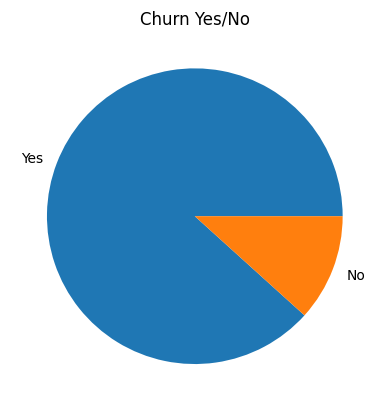

In [14]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn Yes/No")
plt.ylabel("")
plt.show()

In [15]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [16]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [17]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [18]:
df.groupby("ContractType")["MonthlyCharges"].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

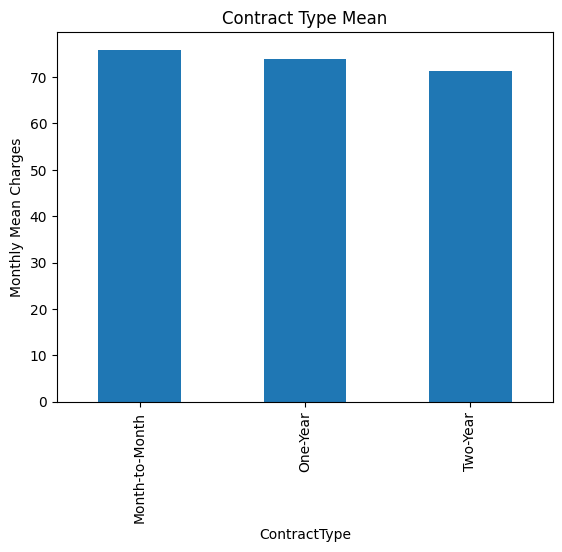

In [19]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.title("Contract Type Mean")
plt.ylabel("Monthly Mean Charges")
plt.show()

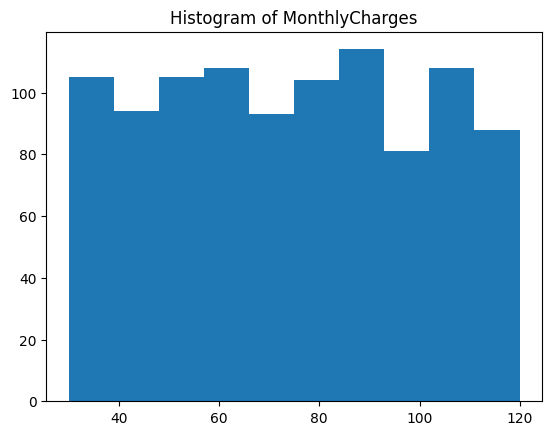

In [20]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of MonthlyCharges")
plt.show()

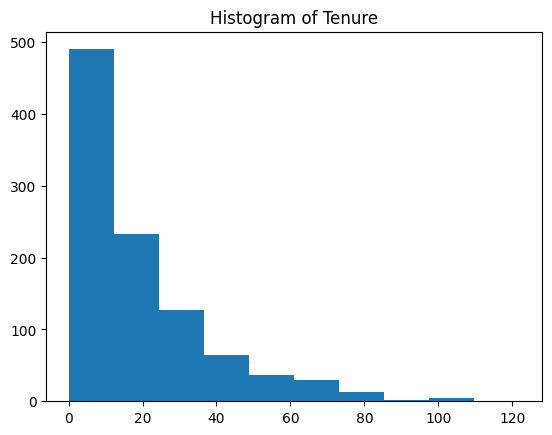

In [21]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [22]:
# Starting with feature engineering

In [23]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [24]:
# to be predicted -> y using predictors -> X

In [25]:
y = df["Churn"]
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [26]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [27]:
# Female -> 1 Male -> 0
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

C:\Users\Dell\AppData\Local\Temp\ipykernel_22208\4259645089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [28]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [29]:
y = y.apply(lambda x: 1 if x == "Yes" else 0)

In [89]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    1
Name: Churn, dtype: int64

In [31]:
import sklearn
print(sklearn.__version__)

1.5.2


In [32]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [34]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [39]:
X_test = scaler.transform(X_test)

In [40]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_model = LogisticRegression()

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = log_model.predict(X_test)

In [47]:
modelperformance(y_pred)

Accuracy score on model is 0.92


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
param_grid = {
    "n_neighbors": [3,5,7,9],
    "weights": ["uniform", "distance"],
}

In [50]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [51]:
gridkn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [52]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [53]:
y_pred = gridkn.predict(X_test)

In [54]:
modelperformance(y_pred)

Accuracy score on model is 0.915


In [55]:
from sklearn.svm import SVC

In [56]:
svm = SVC()

In [57]:
param_grid = {
    "C": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf", "poly"]
}

In [58]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [59]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [60]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [61]:
y_pred = gridsvc.predict(X_test)

In [62]:
modelperformance(y_pred)

Accuracy score on model is 0.935


In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
param_grid = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf": [1,2,4]
}

In [65]:
grid_tree=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [66]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [67]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [68]:
y_pred = grid_tree.predict(X_test)

In [69]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0], dtype=int64)

In [70]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc_model = RandomForestClassifier()

In [73]:
param_grid = {
    "n_estimators": [32, 64, 128, 256],
    "max_features": [2,3,4],
    "bootstrap": [True, False]
}

In [74]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [75]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [76]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 64}

In [77]:
y_pred = grid_rfc.predict(X_test)

In [78]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [79]:
modelperformance(y_pred)

Accuracy score on model is 0.895


In [91]:
best_model = gridsvc

In [81]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [82]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')

In [83]:
import streamlit
print(streamlit.__version__)

1.29.0
